# **P2 Mile Stone 2** 💎

## 1. INTRODUCTION 👋

*   Nama: Karel Gideon Anugrah Hutajulu
*   Batch: FTDS HCK-004
*   Project Type: Computer Vision


### A. Inspiration for this project


- This project was inspired by my parents who works in the forestry Industry and because Indonesia is a tropical country and is surrounded by vast areas of forestry. I also became aware of the devastating effects that forest fires can have on the environment, wildlife, and human lives. 

- With the increasing frequency and severity of forest fires globally, I realized the urgency of developing effective methods for detecting and preventing forest fires. This led me to explore the potential of binary classification algorithms to accurately identify and predict forest fire occurrences, and ultimately motivated me to undertake this project.

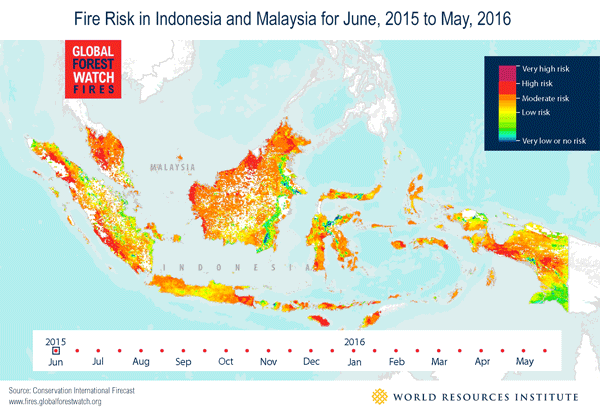

In [11]:
Image('C:/Users/Karel Hutajulu/Desktop/firerisk_GIF_June6_small.png')

### B. Framing the Problem

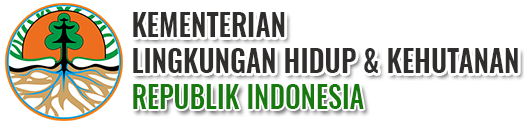

In [12]:
Image('C:/Users/Karel Hutajulu/Desktop/logo-kementriankehutanan.png')

1. **Problem Story** 🚫 📚


- Dian is a park ranger who is responsible for monitoring vast areas of forests in Indonesia. Every day, he patrols the forests and uses binoculars to scan for any signs of smoke or fire.
- Unfortunately, Dian often struggles to accurately detect forest fires early on. He relies on his own eyesight and experience to spot smoke, which can be difficult and sometimes unreliable. As a result, by the time he detects a forest fire, it has already spread significantly and become more difficult to contain.


2. **Solution** ✅

- To address this problem, as part of the Kementrian Perhutanan budget for 2024, the have installed CCTV cams in most areas of the protected forest in Indonesia.
- In order to reduce cost by paying people to monitor the camera and also to reduce the time it takes from a small fire happening to emergency responders being notified, `KEMENHUT` hired a datascience consultant company to create a binarry classification model to predict if the image shown in the cctv contains 'fire' or 'no fire'.

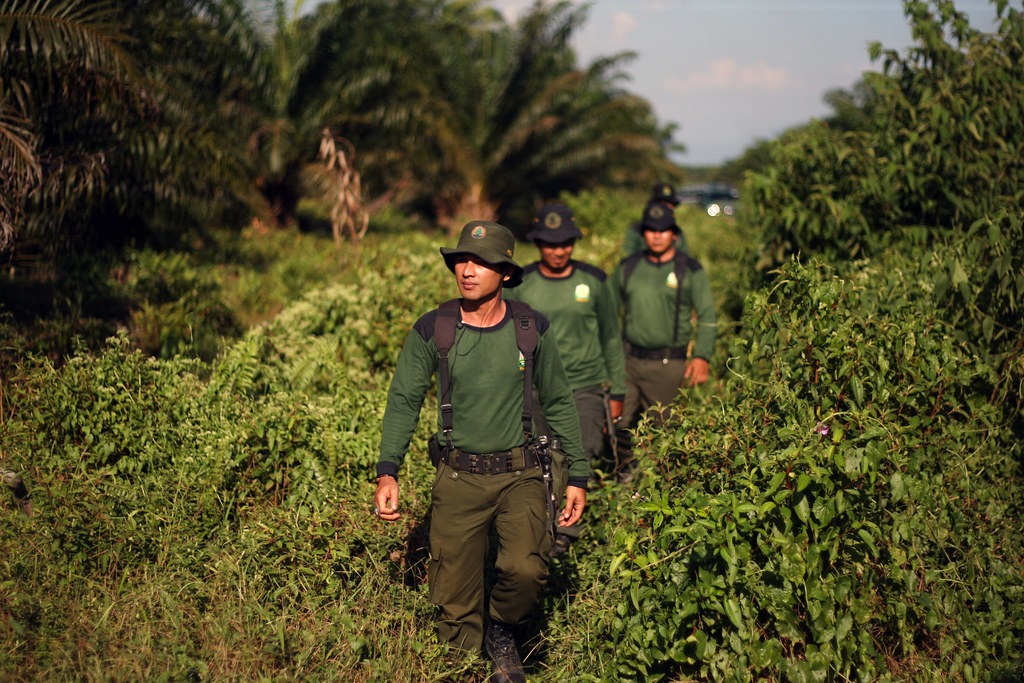

In [13]:
Image('C:/Users/Karel Hutajulu/Desktop/park-ranger.jpg')

### C. Business Objective ⛹

**Business Objective 👍**

1. Develop a binary classification model to accurately predict the presence of forest fires in CCTV camera images.

**Benefits to stakeholders 👍**

1. KEMENHUT (Indonesia's Ministry of Forestry and Environment):

- Efficiently monitor protected forests in Indonesia using CCTV cameras without the need for manual inspection.
- Early detection of forest fires, allowing quick and effective response to prevent the spread of fires.
- Reduced cost by eliminating the need for manual inspection and minimizing damages caused by forest fires.

2. Park Rangers:

- Accurate and timely detection of forest fires, reducing the risk of injury and property damage.
- More efficient allocation of resources, allowing for better management of protected forests.

3. Local Communities:

- Protection of natural resources and habitats, ensuring sustainability for future generations.
- Improved safety and reduced risk of property damage from forest fires.

### D. Business Benefits 💰

**Business Benefits:**

- Improved forest fire detection and response, resulting in `reduced damage to property, wildlife, and the environment`.
- Efficient monitoring of protected forests using CCTV cameras without the need for manual inspection,` reducing costs and improving accuracy.`
- Early detection of forest fires and quick response to `prevent the spread of fires, minimizing the damages caused by forest fires.`
- Better allocation of resources for forest management, `improving efficiency and effectiveness of park rangers' work.`
- Enhanced sustainability and protection of natural resources and habitats,` ensuring long-term benefits for local communities and future generations.`

### E. Getting the Data


In this project, the data will be` collected from CCTV cameras placed around the protected forest.`

For the train and test set image sources, the data is from:
- https://www.kaggle.com/datasets/alik05/forest-fire-dataset?resource=download 

## 2. IMPORT LIBRARIES 💽

In [14]:
import numpy as np 
import pandas as pd  
import os 
from pathlib import Path 

import random

from pathlib import Path

#Visualization
import seaborn as sns 
import matplotlib.pyplot as plt 

import tensorflow as tf  
from tensorflow.keras import layers
from tensorflow.keras import Model  
from tensorflow.keras.optimizers import RMSprop
from keras_preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping


#Attach images to the google notebook
from IPython.display import Image

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from keras.optimizers import RMSprop

#Evaluation

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

#Saving Model

import pickle


pd.set_option('display.max_columns', None)


## 3. DATA LOADING 💽

### 1. Specifying our image path directory

In [15]:
TRAIN_DIR = "C:/Users/Karel Hutajulu/Downloads/Training"

### 2. Labelling file names

We are going to label filenames in the training folder based on their filename.

- If file name starts with `"nofire"` the label will be 0
- if file name starts with `"fire" ` the label wil be 1

A. Fetching the file names in folder **TRAIN_DIR**

In [16]:
filenames = os.listdir(TRAIN_DIR)
categories = []

B. Iterating through every image in folder **TRAIN_DIR** and labelling it

In [17]:
for filename in filenames:
    if filename.startswith("nofire"):
        categories.append(0)
    elif filename.startswith("fire"):
        categories.append(1)

C. Create a new dataframe based on the filenames and their labels

In [18]:
df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

D. Displaying the Dataframe

In [19]:
#Displaying the top 10 values of the dataframe
df.head()

,filename,category
0,fire_0001.jpg,1
1,fire_0003.jpg,1
2,fire_0004.jpg,1
3,fire_0005.jpg,1
4,fire_0006.jpg,1


In [20]:
#Displaying the last 10 values of the dataframe
df.tail()

,filename,category
1515,nofire_0945.jpg,0
1516,nofire_0946.jpg,0
1517,nofire_0947.jpg,0
1518,nofire_0949.jpg,0
1519,nofire_0950.jpg,0


## 4. EXPLORATORY DATA ANALYSIS (EDA) 🎁

### A. Identifying counts for each class

We will visualize the count for each class to see if there is any imbalance in the dataset. 

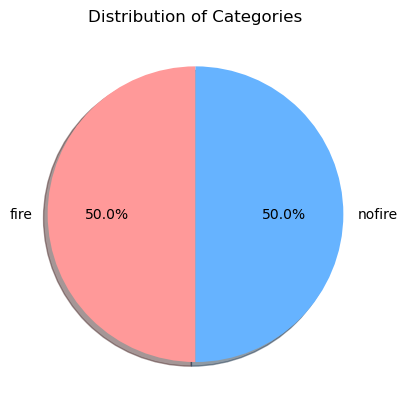

In [21]:
counts = df['category'].value_counts()
labels = ['nofire' if count == 0 else 'fire' for count in counts.index]

plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90, shadow=True, colors=['#ff9999','#66b3ff'])
plt.title('Distribution of Categories')
plt.show()

### B. Seeing Sample Image from the training set

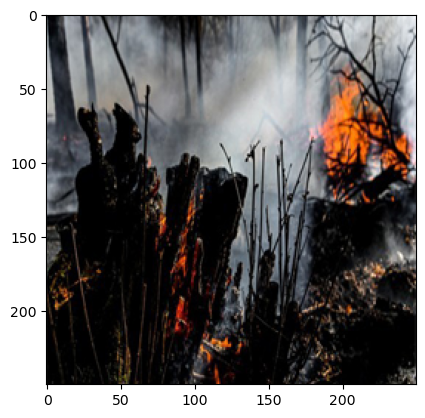

In [22]:
sample = random.choice(filenames)
image = load_img("C:/Users/Karel Hutajulu/Downloads/Training/"+sample)
plt.imshow(image)
plt.show()

## 5. Model Definition 📖

### A. Model Assumptions

1. **Translation invariance:** A CNN assumes that the model should be invariant to translations in the input data. This means that if an object is shifted in the input image, the model should still be able to recognize it.
2. **Robust to noise:** A CNN assumes that the model should be able to handle noise in the input data. This means that the model should be able to recognize patterns in the presence of noise.
3. **Stationary statistics:** A CNN assumes that the statistical properties of the input data are stationary across the image. This means that the patterns that the model learns in one part of the image should be applicable to other parts of the image as well.

**Our Actions**
1. Data Augmentation: Removing Duplicates, Missing values ✅
2. Finding Dataset with sufficient images for classification model ✅

### B. Model Evaluation Metrics

1. Accuracy: The proportion of correctly classified samples out of the total number of samples in the dataset.

2. Precision: The proportion of correctly identified positive samples out of all the samples predicted as positive.

3. Recall: The proportion of correctly identified positive samples out of all the actual positive samples.

4. F1-score: The harmonic mean of precision and recall, giving equal weight to both metrics.

5. Confusion matrix: A table showing the number of correct and incorrect predictions, organized by actual and predicted classes.

**What Metric are we going to use?**

`Recall` is a good metric to use in this case where the `cost of a false negative is high.`

**Why?**

False negatives are more costly as they may lead to `missed opportunities to prevent FOREST FIRES can cause detremental damage to the environment and could even take lives`

### C. Model Definition

**CNN (Convolutional Neural Network):**

- What it is: A CNN is a deep learning model used in image and video recognition tasks.

- How does it work: The model consists of multiple layers, including convolutional layers, pooling layers, and fully connected layers. The convolutional layers extract features from the input images by applying a set of filters, and the pooling layers reduce the dimensionality of the feature maps. The fully connected layers then perform classification based on the extracted features.

- Input: The input to a CNN is a set of images with corresponding class labels, which are used to train the model.

## 6. Training the Model 

### A. Define Constants

We define the variables for ImageDataGenerator to configure how the images should be preprocessed before they are fed into the model during training and validation. There will also be data augmentation later in the code.

- IMAGE_WIDTH = 256: This variable defines the width of the image that we will be processing. In this case, it is set to 256 pixels.

- IMAGE_HEIGHT = 256: This variable defines the height of the image that we will be processing. In this case, it is also set to 256 pixels.

- IMAGE_SIZE = (IMAGE_WIDTH, IMAGE_HEIGHT): This variable is a tuple that contains the image width and height that we defined earlier. We use this variable to pass the image size to different functions in our code.

- IMAGE_CHANNELS = 3: This variable defines the number of color channels in the image. In this case, it is set to 3, which means that we will be processing RGB images.

In [23]:
IMAGE_WIDTH = 256
IMAGE_HEIGHT = 256
IMAGE_SIZE = (IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS = 3

### B. Preparing the Training Data

In [24]:
df["category"] = df["category"].replace({0: 'nofire', 1: 'fire'}) 

### C. Splitting our train image folder to train set and validation set

Since we already have a different image folder for the test set `we will only split the training set into a train set and a validation set.  `

In [25]:
train_df, validate_df = train_test_split(df, test_size=0.20, random_state=42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

Visualizing the distribution of target in our train set

<AxesSubplot:>

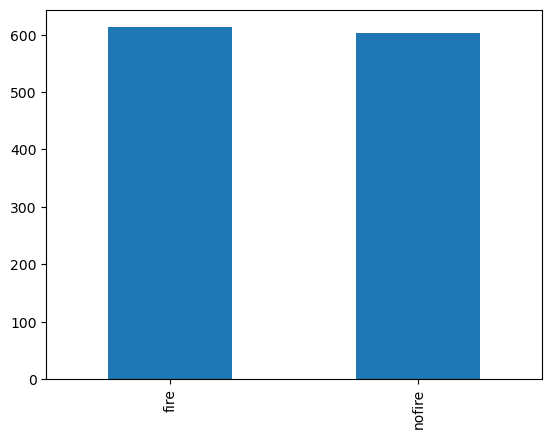

In [26]:
train_df['category'].value_counts().plot.bar()

Visualizing the distribution of target in our validation set

<AxesSubplot:>

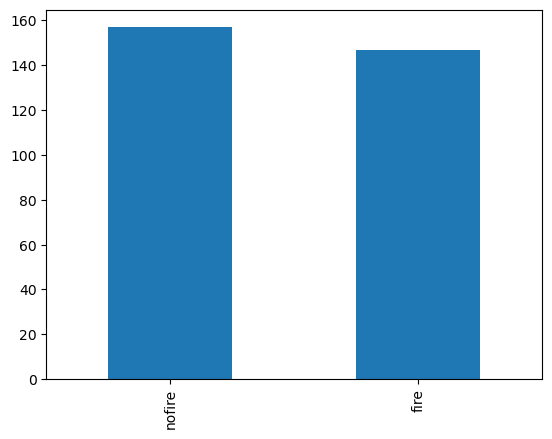

In [27]:
validate_df['category'].value_counts().plot.bar()

In [28]:
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]
batch_size=15

### D. Image Augmentation and train generator

**What is image augmentation and what is it for?**

We define these variables to help augment our data so that our model can generalize better to new images. By applying random transformations to the images, we can simulate a wider range of images that the model is likely to encounter during inference.

- rescale: A value by which we will multiply the pixel values of the images. Here we have set it to 1./255, which means the pixel values will be rescaled to the range [0,1].
- shear_range: Randomly applying shearing transformation to the images.
- zoom_range: Randomly zooming the images.
- horizontal_flip: Randomly flipping the images horizontally.
- rotation_range: Randomly rotating the images.
- width_shift_range: Randomly shifting the images horizontally.
- height_shift_range: Randomly shifting the images vertically.
- validation_split: The percentage of images to use for validation. In this case, we have set it to 0.2, which means 20% of the images will be used for validation.


**What is train generator?**

This code sets up a DirectoryIterator object using flow_from_dataframe() method from the ImageDataGenerator class, which will be used to feed images into the deep learning model during training. Here's what each argument does:

- train_df: The training dataframe that contains the image filenames and their corresponding categories.
- directory: The path to the directory that contains the training images.
- x_col: The column in train_df that contains the filenames of the training images.
- y_col: The column in train_df that contains the category labels of the training images.
- target_size: The size to which all images will be resized. Here, it is set to (256, 256) to ensure that all images have the same dimensions.
- class_mode: Set to "categorical" because we have more than two classes in our classification problem.
- batch_size: The number of images to include in each batch of data during training.

In [29]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_datagen.flow_from_dataframe(
    train_df,
    directory=TRAIN_DIR,
    x_col="filename",
    y_col="category",
    target_size=IMAGE_SIZE,
    class_mode="categorical",
    batch_size=batch_size
)


Found 1216 validated image filenames belonging to 2 classes.


Validation datagen only contains rescaling because  `image augmentation is only done in the training set `

In [30]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    directory=TRAIN_DIR,
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 304 validated image filenames belonging to 2 classes.


### E. Viewing an example of image augmentation

Seeing how distortion, rotation, scaling, e.t.c effects an image.

In [31]:
example_df = train_df.sample(n=1).reset_index(drop=True)
example_generator = train_datagen.flow_from_dataframe(
    example_df, 
    directory=TRAIN_DIR, 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical'
)

Found 1 validated image filenames belonging to 1 classes.


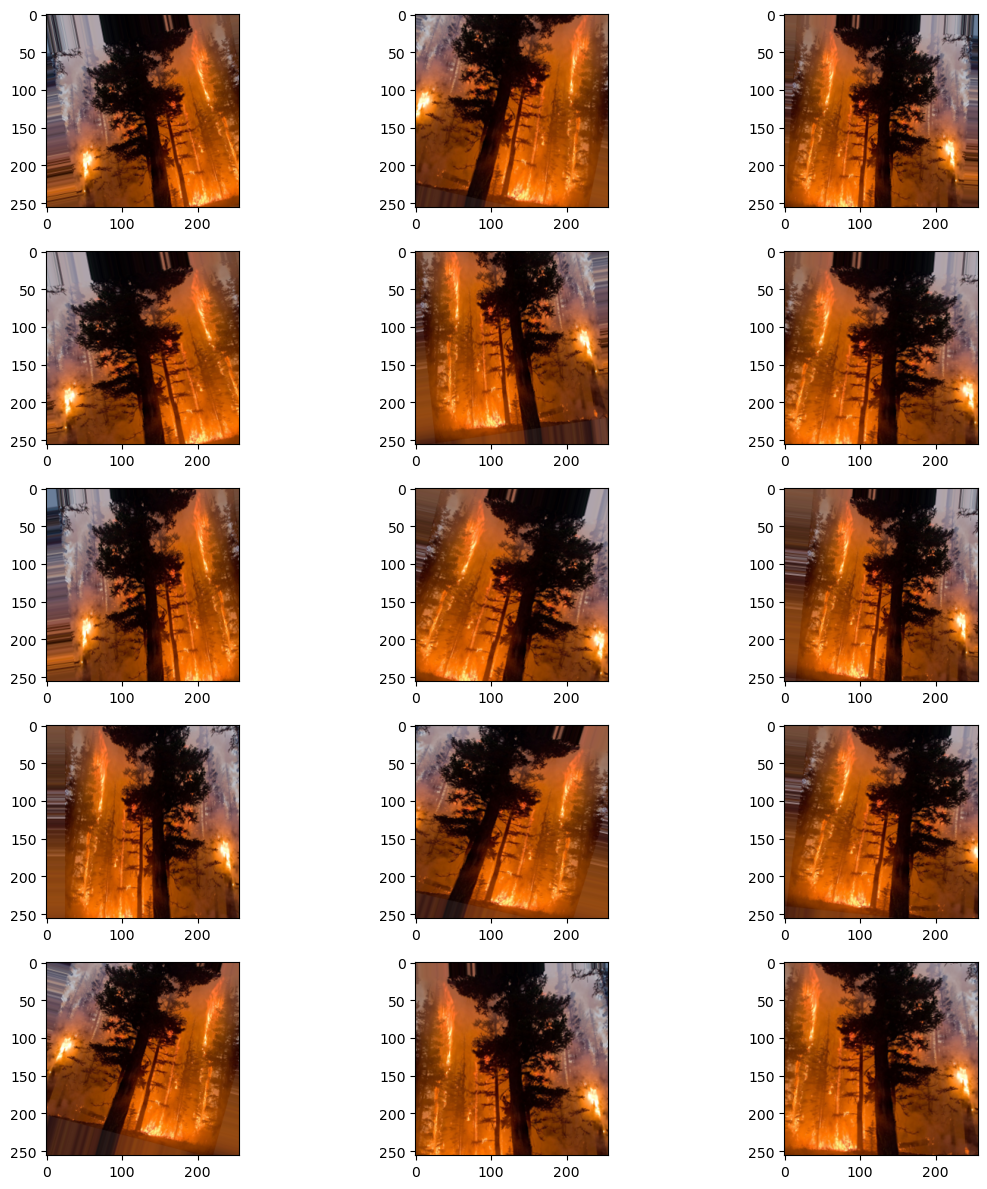

In [32]:
plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in example_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

### F. Defining the initial Model

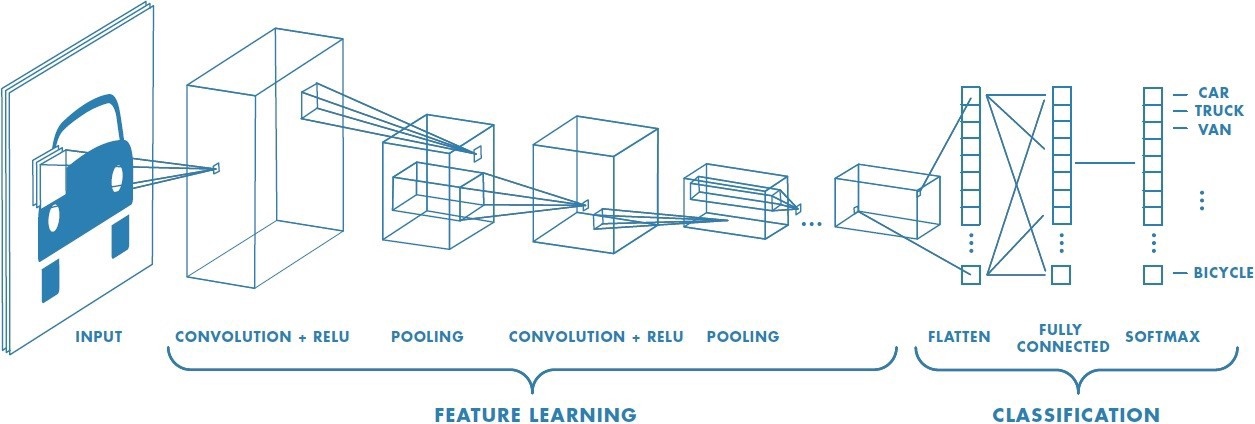

In [33]:
Image('C:/Users/Karel Hutajulu/Downloads/process-cnn.jpg')

- Input Layer: It represent input image data. It will reshape image into single diminsion array. 
- Conv Layer: This layer will extract features from image.
- Pooling Layer: This layerreduce the spatial volume of input image after convolution.
- Fully Connected Layer: It connect the network from a layer to another layer
- Output Layer: It is the predicted values layer.

1. Fitting the Model (RMSPROP w/o batchnormalization, dropout and earlystop)

In [34]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))

model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(64, (3, 3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(128, (3, 3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())
model.add(Dense(512, activation='relu'))

model.add(Dense(2, activation='softmax')) # 2 because we have cat and dog classes

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 128)     

In [35]:
epochs=10
history = model.fit_generator(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
)

C:\Users\Karel Hutajulu\AppData\Local\Temp\ipykernel_7872\344140830.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/10
81/81 [==============================] - 69s 841ms/step - loss: 0.9577 - accuracy: 0.8435 - val_loss: 0.1663 - val_accuracy: 0.9467
Epoch 2/10
81/81 [==============================] - 62s 767ms/step - loss: 0.2156 - accuracy: 0.9309 - val_loss: 0.2119 - val_accuracy: 0.8900
Epoch 3/10
81/81 [==============================] - 60s 744ms/step - loss: 0.1984 - accuracy: 0.9367 - val_loss: 0.1380 - val_accuracy: 0.9500
Epoch 4/10
81/81 [==============================] - 72s 889ms/step - loss: 0.1762 - accuracy: 0.9525 - val_loss: 0.1272 - val_accuracy: 0.9500
Epoch 5/10
81/81 [==============================] - 102s 1s/step - loss: 0.1607 - accuracy: 0.9484 - val_loss: 0.1389 - val_accuracy: 0.9567
Epoch 6/10
81/81 [==============================] - 157s 2s/step - loss: 0.1535 - accuracy: 0.9465 - val_loss: 0.0990 - val_accuracy: 0.9567
Epoch 7/10
81/81 [==============================] - 97s 1s/step - loss: 0.1316 - accuracy: 0.9575 - val_loss: 0.1211 - val_accuracy: 0.9533
Epoch 

2. Visualizing the result (RMSPROP w/o batchnormalization, dropout and earlystop)

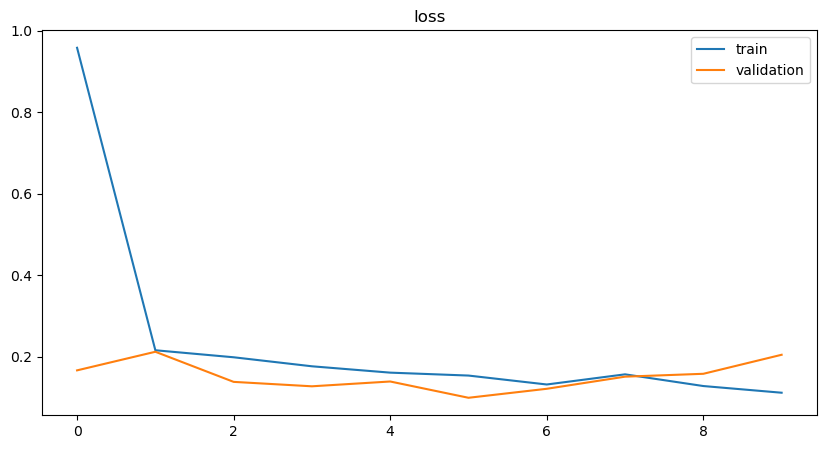

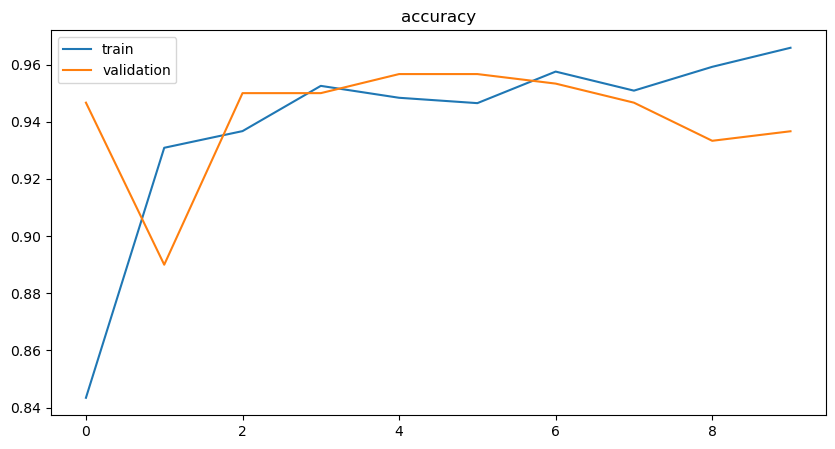

In [36]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.title('loss')
plt.legend()
plt.show()
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.title('accuracy')
plt.legend()
plt.show()

**Observation:**

- Based on the training history, the model seems to be `performing well` on both the training and validation sets. 
- The accuracy steadily increased over the course of training, indicating that the model was effectively learning and improving.
- The loss consistently decreased over time, demonstrating that the model was able to minimize its error on the training data.
- The accuracy and loss curves closely followed each other, suggesting that the model was not overfitting to the training data.

### G. Model Improvement

1. Training the Model (RMSPROP with batchnormalization, dropout)

In [37]:
model_dropout_normalization = Sequential()

model_dropout_normalization.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model_dropout_normalization.add(BatchNormalization())
model_dropout_normalization.add(MaxPooling2D(pool_size=(2, 2)))
model_dropout_normalization.add(Dropout(0.25))

model_dropout_normalization.add(Conv2D(64, (3, 3), activation='relu'))
model_dropout_normalization.add(BatchNormalization())
model_dropout_normalization.add(MaxPooling2D(pool_size=(2, 2)))
model_dropout_normalization.add(Dropout(0.25))

model_dropout_normalization.add(Conv2D(128, (3, 3), activation='relu'))
model_dropout_normalization.add(BatchNormalization())
model_dropout_normalization.add(MaxPooling2D(pool_size=(2, 2)))
model_dropout_normalization.add(Dropout(0.25))

model_dropout_normalization.add(Flatten())
model_dropout_normalization.add(Dense(512, activation='relu'))
model_dropout_normalization.add(BatchNormalization())
model_dropout_normalization.add(Dropout(0.5))
model_dropout_normalization.add(Dense(2, activation='softmax')) # 2 because we have cat and dog classes

model_dropout_normalization.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model_dropout_normalization.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 127, 127, 32)      0         
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)    

In [38]:
epochs=10
history = model_dropout_normalization.fit_generator(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    
)

C:\Users\Karel Hutajulu\AppData\Local\Temp\ipykernel_7872\2569117888.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model_dropout_normalization.fit_generator(


Epoch 1/10
81/81 [==============================] - 142s 2s/step - loss: 0.4886 - accuracy: 0.8834 - val_loss: 2.2693 - val_accuracy: 0.4800
Epoch 2/10
81/81 [==============================] - 151s 2s/step - loss: 0.2760 - accuracy: 0.9117 - val_loss: 2.8475 - val_accuracy: 0.4833
Epoch 3/10
81/81 [==============================] - 155s 2s/step - loss: 0.2221 - accuracy: 0.9242 - val_loss: 1.3880 - val_accuracy: 0.5167
Epoch 4/10
81/81 [==============================] - 101s 1s/step - loss: 0.2356 - accuracy: 0.9259 - val_loss: 0.3688 - val_accuracy: 0.8200
Epoch 5/10
81/81 [==============================] - 91s 1s/step - loss: 0.1816 - accuracy: 0.9342 - val_loss: 1.7072 - val_accuracy: 0.5767
Epoch 6/10
81/81 [==============================] - 78s 958ms/step - loss: 0.1815 - accuracy: 0.9367 - val_loss: 0.3551 - val_accuracy: 0.8533
Epoch 7/10
81/81 [==============================] - 77s 952ms/step - loss: 0.1691 - accuracy: 0.9442 - val_loss: 0.1922 - val_accuracy: 0.9067
Epoch 8/10

2. Visualizing the result (RMSPROP with batchnormalization, dropout)

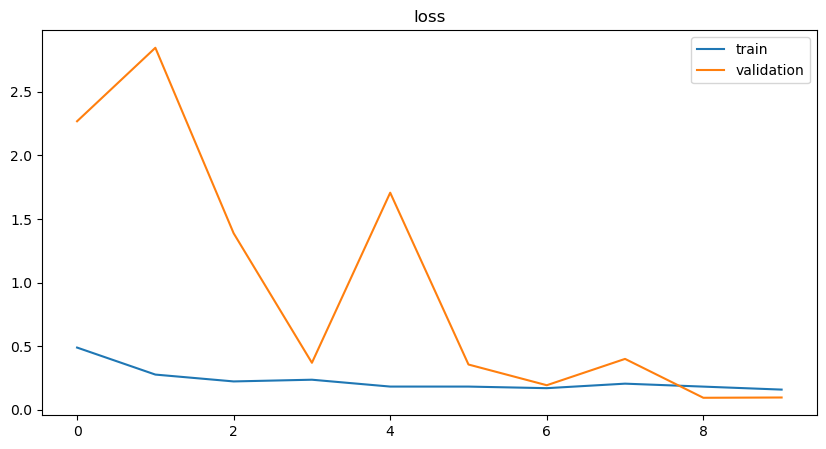

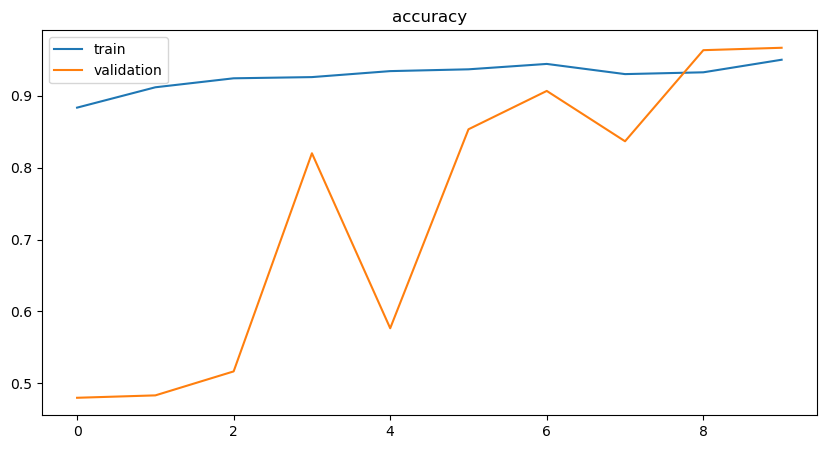

In [39]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.title('loss')
plt.legend()
plt.show()
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.title('accuracy')
plt.legend()
plt.show()

**Observation**

- The training accuracy suddenly spiked after 2 epochs, indicating an exploding epoch.
- The model's loss started diverging rapidly after the 4th epoch, suggesting an issue with the training process.
- An exploding accuracy occurred around the 7th epoch, indicating that the model may have started to overfit the training data.

1. Training the Model (RMSPROP with batchnormalizataion, dropout and earlystop)

In [40]:
# Define early stopping callback
early_stop = EarlyStopping(monitor='val_loss', patience=5)

In [41]:
epochs=10
history = model_dropout_normalization.fit_generator(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=[early_stop]
)

C:\Users\Karel Hutajulu\AppData\Local\Temp\ipykernel_7872\2276405891.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model_dropout_normalization.fit_generator(


Epoch 1/10
81/81 [==============================] - 126s 2s/step - loss: 0.1562 - accuracy: 0.9467 - val_loss: 0.3179 - val_accuracy: 0.8800
Epoch 2/10
81/81 [==============================] - 95s 1s/step - loss: 0.1544 - accuracy: 0.9424 - val_loss: 0.1125 - val_accuracy: 0.9567
Epoch 3/10
81/81 [==============================] - 87s 1s/step - loss: 0.1331 - accuracy: 0.9509 - val_loss: 0.1057 - val_accuracy: 0.9633
Epoch 4/10
81/81 [==============================] - 84s 1s/step - loss: 0.1346 - accuracy: 0.9517 - val_loss: 0.2058 - val_accuracy: 0.9067
Epoch 5/10
81/81 [==============================] - 130s 2s/step - loss: 0.1313 - accuracy: 0.9609 - val_loss: 0.1299 - val_accuracy: 0.9400
Epoch 6/10
81/81 [==============================] - 79s 975ms/step - loss: 0.1208 - accuracy: 0.9584 - val_loss: 0.0890 - val_accuracy: 0.9533
Epoch 7/10
81/81 [==============================] - 76s 939ms/step - loss: 0.1578 - accuracy: 0.9525 - val_loss: 0.1268 - val_accuracy: 0.9467
Epoch 8/10
8

2. Visualizing the result (RMSPROP with batchnormalizataion, dropout and earlystop)

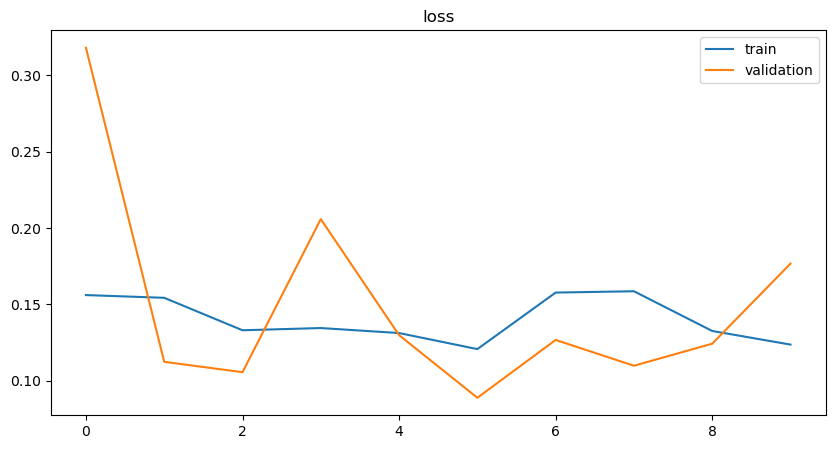

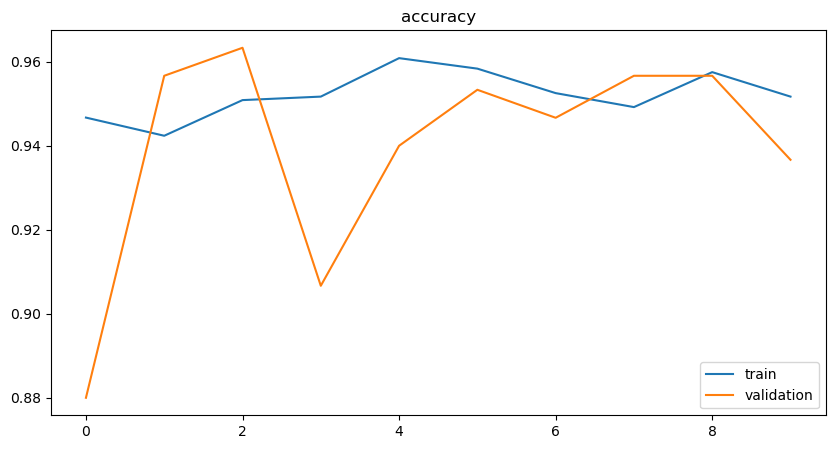

In [42]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.title('loss')
plt.legend()
plt.show()
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.title('accuracy')
plt.legend()
plt.show()

**Observation**

- The accuracy and loss curves show a general trend of improvement, but with `some fluctuations and deviations` from each other, suggesting that the model may not be learning as efficiently as it could be.
- The accuracy and loss curves appear to be following each other, but with some `variability and noise`
- Although the accuracy and loss curves are not stable, they show some degree of improvement over time, indicating that the model may benefit from additional training or regularization techniques.
- It `performs better than the last model without early stop`

1. Training the Model (Adam with batchnormalizataion, dropout and earlystop)

In [43]:
model_adam = Sequential()

model_adam.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model_adam.add(BatchNormalization())
model_adam.add(MaxPooling2D(pool_size=(2, 2)))
model_adam.add(Dropout(0.25))

model_adam.add(Conv2D(64, (3, 3), activation='relu'))
model_adam.add(BatchNormalization())
model_adam.add(MaxPooling2D(pool_size=(2, 2)))
model_adam.add(Dropout(0.25))

model_adam.add(Conv2D(128, (3, 3), activation='relu'))
model_adam.add(BatchNormalization())
model_adam.add(MaxPooling2D(pool_size=(2, 2)))
model_adam.add(Dropout(0.25))

model_adam.add(Flatten())
model_adam.add(Dense(512, activation='relu'))
model_adam.add(BatchNormalization())
model_adam.add(Dropout(0.5))
model_adam.add(Dense(2, activation='softmax')) # 2 because we have cat and dog classes

model_adam.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model_adam.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_4 (Batc  (None, 254, 254, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 127, 127, 32)      0         
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_5 (Batc  (None, 125, 125, 64)    

In [44]:
epochs=10
history = model_adam.fit_generator(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=[early_stop]
)

Epoch 1/10


C:\Users\Karel Hutajulu\AppData\Local\Temp\ipykernel_7872\3409563730.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model_adam.fit_generator(


81/81 [==============================] - 97s 1s/step - loss: 0.4792 - accuracy: 0.9042 - val_loss: 3.1963 - val_accuracy: 0.4833
Epoch 2/10
81/81 [==============================] - 83s 1s/step - loss: 0.2249 - accuracy: 0.9301 - val_loss: 0.8269 - val_accuracy: 0.5100
Epoch 3/10
81/81 [==============================] - 89s 1s/step - loss: 0.1630 - accuracy: 0.9442 - val_loss: 1.2996 - val_accuracy: 0.4967
Epoch 4/10
81/81 [==============================] - 96s 1s/step - loss: 0.1564 - accuracy: 0.9467 - val_loss: 0.4847 - val_accuracy: 0.7500
Epoch 5/10
81/81 [==============================] - 137s 2s/step - loss: 0.1754 - accuracy: 0.9367 - val_loss: 0.2134 - val_accuracy: 0.9300
Epoch 6/10
81/81 [==============================] - 85s 1s/step - loss: 0.1923 - accuracy: 0.9409 - val_loss: 0.4716 - val_accuracy: 0.7833
Epoch 7/10
81/81 [==============================] - 97s 1s/step - loss: 0.1711 - accuracy: 0.9417 - val_loss: 0.2445 - val_accuracy: 0.9100
Epoch 8/10
81/81 [============

2. Visualizing the result (Adam with batchnormalizataion, dropout and earlystop)

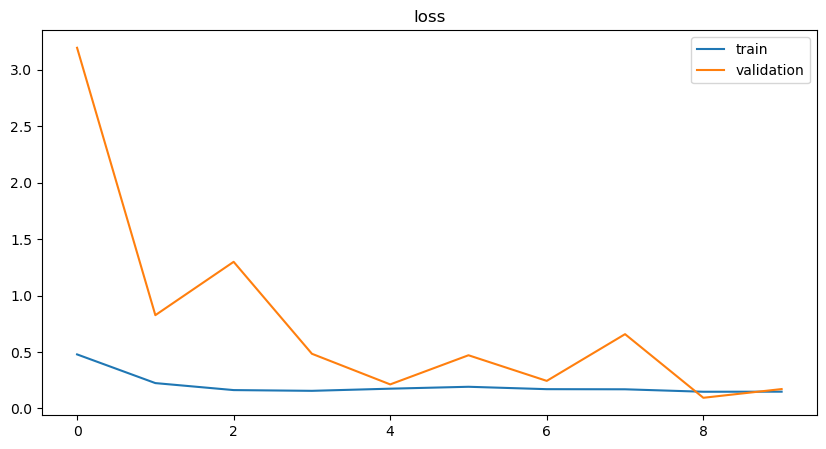

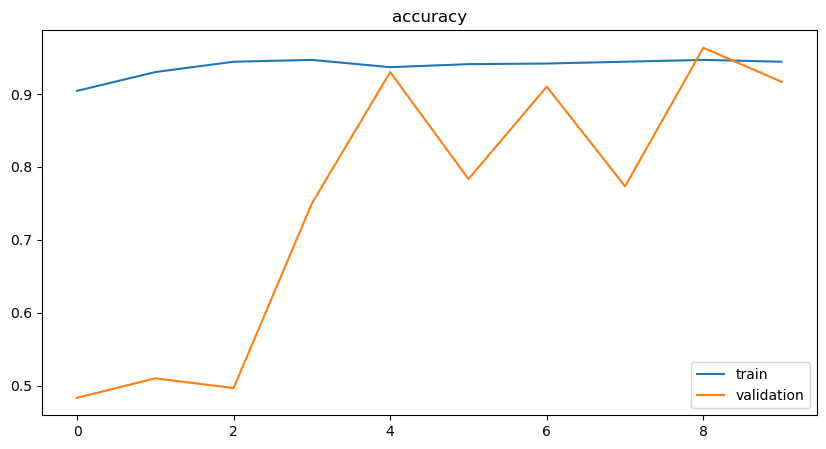

In [45]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.title('loss')
plt.legend()
plt.show()
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.title('accuracy')
plt.legend()
plt.show()

**Observation**

-  `Takes longer` than the rmsprop optimizer
-  The accuracy and loss curves show a general trend of improvement, but with `some fluctuations and deviations` from each other, suggesting that the model may not be learning as efficiently as it could be.
- The accuracy and loss curves appear to be following each other, but with some `variability and noise`

## 7. Applying the Model on Test Dataset

First of all we begin by defining the test directory

In [46]:
TEST_DIR = "C:/Users/Karel Hutajulu/Downloads/Testing"

Then we create a pandas dataframe that contains all the filenames in the test directory.

In [47]:
test_filenames = os.listdir(TEST_DIR)
test_df = pd.DataFrame({
    'filename': test_filenames
})
nb_samples = test_df.shape[0]

In [48]:
test_df.head()

,filename
0,fire_0002.jpg
1,fire_0015.jpg
2,fire_0027.jpg
3,fire_0038.jpg
4,fire_0040.jpg


Because the filenames are already labelled we can create a new column that consist of the real category based on the file names

In [49]:
real_categories = []
for filename in test_df['filename']:
    if filename.startswith("nofire"):
        real_categories.append(0)
    elif filename.startswith("fire"):
        real_categories.append(1)
test_df['real_category'] = real_categories


In [50]:
test_df.head()

,filename,real_category
0,fire_0002.jpg,1
1,fire_0015.jpg,1
2,fire_0027.jpg,1
3,fire_0038.jpg,1
4,fire_0040.jpg,1


Next we create a test_generator to feed the testing data to the cnn model. Remember since we are testing there are no labels given, that is why the y_col is empty.

In [51]:
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    test_df, 
    directory=TEST_DIR, 
    x_col='filename',
    y_col=None,
    class_mode=None,
    target_size=IMAGE_SIZE,
    batch_size=batch_size,
    shuffle=False
)

Found 380 validated image filenames.


Predicting the test set. We will be predicting on firstly our model with the best result (`model.adam`), then we see how the other models perform on the test set

### 1. Predicting using model_adam

In [52]:
predict = model_adam.predict_generator(test_generator, steps=np.ceil(nb_samples/batch_size))

C:\Users\Karel Hutajulu\AppData\Local\Temp\ipykernel_7872\59179781.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predict = model_adam.predict_generator(test_generator, steps=np.ceil(nb_samples/batch_size))


For categoral classication the prediction will come with probability of each category. So we will pick the category that have the highest probability with numpy average max

In [53]:
test_df['predicted_category'] = np.argmax(predict, axis=-1)

In [54]:
label_map = dict((v,k) for k,v in train_generator.class_indices.items())
test_df['predicted_category'] = test_df['predicted_category'].replace(label_map)

In [55]:
test_df['predicted_category'] = test_df['predicted_category'].replace({ 'fire': 1, 'nofire': 0 })

In [56]:
test_df.head(10)

,filename,real_category,predicted_category
0,fire_0002.jpg,1,1
1,fire_0015.jpg,1,1
2,fire_0027.jpg,1,1
3,fire_0038.jpg,1,1
4,fire_0040.jpg,1,1
5,fire_0048.jpg,1,1
6,fire_0063.jpg,1,1
7,fire_0072.jpg,1,1
8,fire_0084.jpg,1,1
9,fire_0091.jpg,1,1


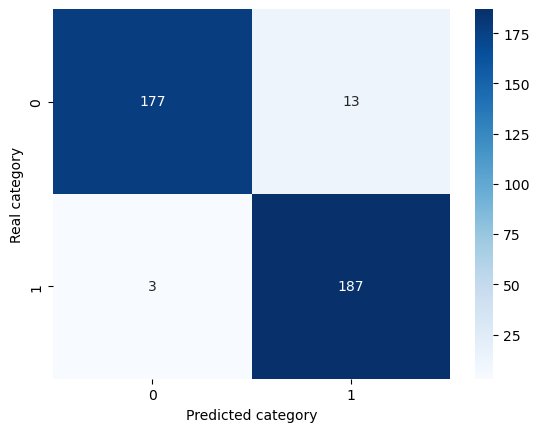

              precision    recall  f1-score   support

           0       0.98      0.93      0.96       190
           1       0.94      0.98      0.96       190

    accuracy                           0.96       380
   macro avg       0.96      0.96      0.96       380
weighted avg       0.96      0.96      0.96       380



In [57]:
# Compute the confusion matrix
cm = confusion_matrix(test_df['real_category'], test_df['predicted_category'])

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted category')
plt.ylabel('Real category')
plt.show()

report = classification_report(test_df["real_category"], test_df["predicted_category"])
print(report)

### 2. Predicting using model_dropout_normalization (rmsprop)

In [58]:
test_df2 = test_df.copy()

In [59]:
predict = model_dropout_normalization.predict_generator(test_generator, steps=np.ceil(nb_samples/batch_size))

C:\Users\Karel Hutajulu\AppData\Local\Temp\ipykernel_7872\2366822039.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predict = model_dropout_normalization.predict_generator(test_generator, steps=np.ceil(nb_samples/batch_size))


In [60]:
test_df2['predicted_category'] = np.argmax(predict, axis=-1)

label_map = dict((v,k) for k,v in train_generator.class_indices.items())
test_df2['predicted_category'] = test_df2['predicted_category'].replace(label_map)

test_df2['predicted_category'] = test_df2['predicted_category'].replace({ 'fire': 1, 'nofire': 0 })

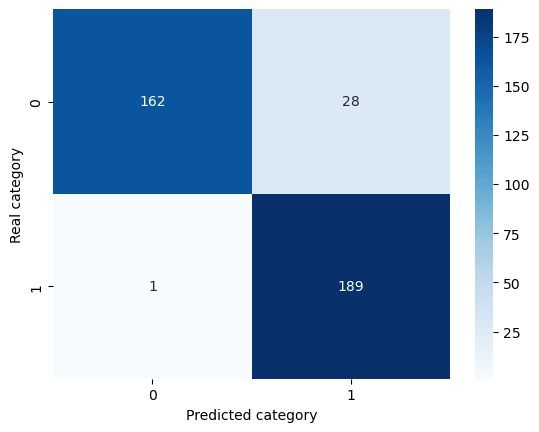

              precision    recall  f1-score   support

           0       0.99      0.85      0.92       190
           1       0.87      0.99      0.93       190

    accuracy                           0.92       380
   macro avg       0.93      0.92      0.92       380
weighted avg       0.93      0.92      0.92       380



In [61]:
# Compute the confusion matrix
cm = confusion_matrix(test_df2['real_category'], test_df2['predicted_category'])

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted category')
plt.ylabel('Real category')
plt.show()


report = classification_report(test_df2["real_category"], test_df2["predicted_category"])
print(report)

### 3. Predicting using model (rmsprop) (without dropout and normalization)

In [62]:
test_df3 = test_df.copy()

In [63]:
predict = model.predict_generator(test_generator, steps=np.ceil(nb_samples/batch_size))

C:\Users\Karel Hutajulu\AppData\Local\Temp\ipykernel_7872\3090721588.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predict = model.predict_generator(test_generator, steps=np.ceil(nb_samples/batch_size))


In [64]:
test_df3['predicted_category'] = np.argmax(predict, axis=-1)

label_map = dict((v,k) for k,v in train_generator.class_indices.items())
test_df3['predicted_category'] = test_df3['predicted_category'].replace(label_map)

test_df3['predicted_category'] = test_df3['predicted_category'].replace({ 'fire': 1, 'nofire': 0 })

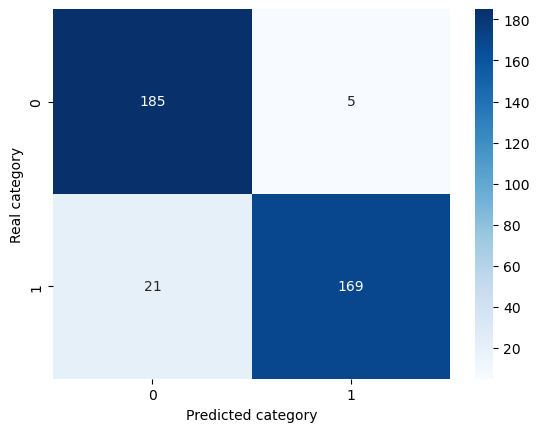

              precision    recall  f1-score   support

           0       0.90      0.97      0.93       190
           1       0.97      0.89      0.93       190

    accuracy                           0.93       380
   macro avg       0.93      0.93      0.93       380
weighted avg       0.93      0.93      0.93       380



In [65]:
# Compute the confusion matrix
cm = confusion_matrix(test_df3['real_category'], test_df3['predicted_category'])

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted category')
plt.ylabel('Real category')
plt.show()



report = classification_report(test_df3["real_category"], test_df3["predicted_category"])
print(report)

## 8.  Overall Technical Analysis 🏞

### 2.Convolutional Neural Network (CNN) Strengths and Weaknesses

- A. Strengths: 💪

1. CNNs are particularly effective for image and video recognition tasks, where they can automatically learn the features and patterns in the images and identify objects in the scene.
2. CNNs are less prone to overfitting than traditional ANNs, particularly when used with techniques like pooling and dropout.
3. CNNs are capable of learning spatial hierarchies of features, making them particularly useful for tasks like object detection and segmentation.
4. CNNs are capable of handling large input sizes and can scale to complex tasks, such as image captioning and video classification.
5. CNNs can be used for both supervised and unsupervised learning, making them versatile for a wide range of applications.

- B. Weaknesses: 🔰

1. CNNs can be computationally intensive and require large amounts of memory and processing power to train and run, making them unsuitable for use on low-end devices or in real-time applications.
2. CNNs can be difficult to interpret, and it can be challenging to understand how the network arrived at its decision, particularly in deep neural networks with many layers.
3. CNNs require a large amount of training data to achieve good performance, and the quality of the results depends heavily on the quality of the training data.
4. CNNs can be sensitive to the choice of hyperparameters, such as the number of filters and the size of the kernel, and tuning these parameters can be a time-consuming process.
5. CNNs can struggle with variability in the input data, such as changes in lighting or orientation, and may require additional data augmentation techniques to improve performance.

------------

### 2. Model Metrics Comparison

- `Adam (after improvement)` Test accuracy: 0.96, recall (false negative): 0.98
- `rms prop (after improvement)` Test accuracy: 0.92, recall (false negative): 0.99
- `rms prop (before improvement)` Test accuracy: 0.93, recall (false negative): 0.89

Conclusion: The best score is `Adam (after improvement)` with a test accuracy of 0.99

Eventhough  `rms prop (after improvement)` has such a low false negative score, the total accuracy is much lower than the other models. In this business case the model will still be reviewed by the forest watcher for human validation so false positive can still be tolerable

**Model we will be picking:** We will be using the Adam (after improvement) API ANN for data inference

----
### 3. Is it enough to use in the business?

- `The model is doing well in identifying` both fire and no fire. Because there will still be human authentication/verification, it is safe to deploy the model in real life.

## 9.  Overall Business Analysis 🏞

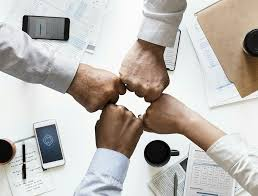

In [66]:
Image('C:/Users/Karel Hutajulu/Downloads/benefits.jpeg')

**1. Business Benefits**
- Early detection and prediction of forest fires can` help reduce the severity of fires and minimize damage to the environment and local communities,` leading to `cost savings and increased safety.`
- The ability to predict forest fires in advance can also help authorities to take preventative measures, such as implementing fire suppression techniques, evacuating residents in high-risk areas, and mobilizing firefighting resources to the area before the fire spreads, `potentially saving lives and minimizing property damage.`
- A CNN image classification model can be trained to identify other types of environmental hazards, such as landslides, floods, and earthquakes, which can `further help local authorities to take preventative measures and reduce the risk of damage to the environment and human life.`
- The deployment of a CNN image classification model can provide a `competitive advantage for businesses and organizations` involved in environmental monitoring and risk management, allowing them to `offer more accurate and efficient services to their clients.`


**2. Potential Business Weakness**

- `Requires large amounts of data`: ANN models require a large amount of data to be trained effectively. This means that businesses need to have access to a lot of customer data to build an effective model.

- `Can be computationally expensive`: ANN models can be computationally expensive, particularly if they are large or complex. This means that they may require expensive hardware or cloud resources to train and deploy.

- Black box model: `ANNs can be difficult to interpret`, which can make it challenging to understand why certain predictions are being made. This can be a concern for businesses that need to be able to explain their decisions to customers or regulators.

- `Model may become obsolete`: ANNs `require regular updating and retraining` to maintain their accuracy. This means that businesses need to have the resources and expertise to keep their models up to date.


## 10. Saving models 🦺

In [67]:
with open('cnn_model.pkl', 'wb') as file:
    pickle.dump(model_adam, file)

In [68]:
print(tf.__version__)
print(tf.keras.__version__)

2.12.0
2.12.0


In [69]:
!pip show scikit-learn

Name: scikit-learn
Version: 1.1.1
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: c:\dev\miniconda3\envs\datascience\lib\site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: dabl, openTSNE, Orange3, Orange3-Network, Orange3-Prototypes


## External Learning Resource and Reference 📖

1. Eda for CNN Classificaiton
- https://medium.com/geekculture/eda-for-image-classification-dcada9f2567a
- https://www.kaggle.com/code/ligtfeather/eda-and-cnn-for-image-classification

2. CNN
- https://www.tensorflow.org/tutorials/images/cnn
- https://www.kaggle.com/code/uysimty/keras-cnn-dog-or-cat-classification
- https://www.kaggle.com/code/mahmoudreda55/imagedatagenerator
- https://neptune.ai/blog/image-classification-tips-and-tricks-from-13-kaggle-competitions